In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# Define the deep MLP model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
# Function to exponentially grow the learning rate
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [7]:
# Define the learning rate scheduler
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)


In [8]:
# Train the model
history = model.fit(X_train.reshape(-1, 784), y_train, epochs=30, validation_split=0.1, callbacks=[lr_scheduler])


Epoch 1/30
1688/1688 [==============================] - 5s 2ms/step - loss: 0.6235 - accuracy: 0.8393 - val_loss: 0.2789 - val_accuracy: 0.9245 - lr: 0.0100
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3008 - accuracy: 0.9150 - val_loss: 0.2216 - val_accuracy: 0.9383 - lr: 0.0089
Epoch 3/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2525 - accuracy: 0.9289 - val_loss: 0.1925 - val_accuracy: 0.9465 - lr: 0.0079
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2223 - accuracy: 0.9370 - val_loss: 0.1857 - val_accuracy: 0.9503 - lr: 0.0071
Epoch 5/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2012 - accuracy: 0.9422 - val_loss: 0.1598 - val_accuracy: 0.9580 - lr: 0.0063
Epoch 6/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1852 - accuracy: 0.9476 - val_loss: 0.1527 - val_accuracy: 0.9598 - lr: 0.0056
Epoch 7/30
1688/1688 [==============================] - 5s

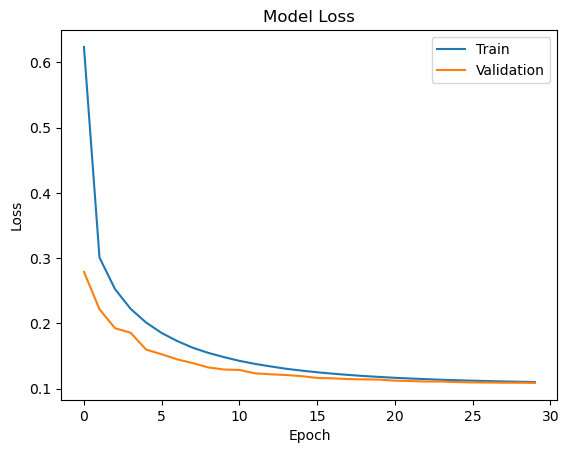

In [9]:
# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [10]:
# Find the optimal learning rate
learning_rates = 0.01 * (10 ** (np.arange(30) / 20))
losses = history.history['loss']
best_learning_rate = learning_rates[np.argmin(losses)]
print('Best learning rate:', best_learning_rate)

Best learning rate: 0.2818382931264453


In [11]:
# Retrain the model with the best learning rate
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=best_learning_rate), metrics=['accuracy'])
model.fit(X_train.reshape(-1, 784), y_train, epochs=30, validation_split=0.1)


Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2301 - accuracy: 0.9280 - val_loss: 0.1496 - val_accuracy: 0.9552
Epoch 2/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0961 - accuracy: 0.9691 - val_loss: 0.1268 - val_accuracy: 0.9628
Epoch 3/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0658 - accuracy: 0.9796 - val_loss: 0.0799 - val_accuracy: 0.9767
Epoch 4/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0485 - accuracy: 0.9845 - val_loss: 0.0802 - val_accuracy: 0.9773
Epoch 5/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0729 - val_accuracy: 0.9808
Epoch 6/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.0674 - val_accuracy: 0.9830
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.0966 - val_accuracy:

In [12]:
# Evaluate the model on the test set
_, test_accuracy = model.evaluate(X_test.reshape(-1, 784), y_test)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0913 - accuracy: 0.9844
Test accuracy: 0.9843999743461609
